<a href="https://colab.research.google.com/github/Subhash-Pal/GenerativeAI/blob/main/TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generative AI**
 is a category of AI algorithms that use data to create new outputs. It has a variety of applications, including creating text, audio, and images

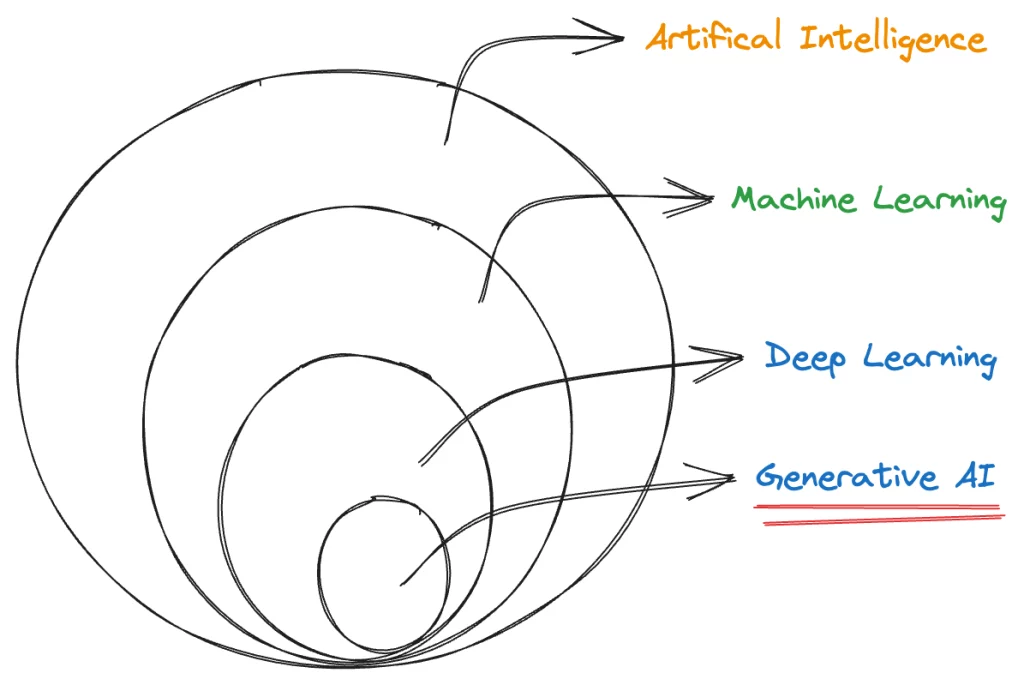

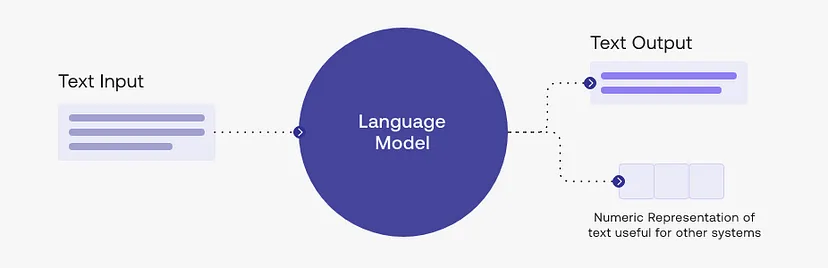

**What is LLM ?**

**How it Works ?**

**What is structure of a Generic LLM ?**



**Large Language Models (LLMs)** are advanced artificial intelligence (AI) systems designed to process, understand, and generate human-like text. They’re based on deep learning techniques and trained on massive datasets, usually containing billions of words from diverse sources like websites, books, and articles. This extensive training enables LLMs to grasp the nuances of language, grammar, context, and even some aspects of general knowledge.

Some popular LLMs, like OpenAI’s GPT-3, employ a type of neural network called a transformer, which allows them to handle complex language tasks with remarkable proficiency. These models can perform a wide range of tasks, such as:

**Answering questions**

**Summarizing text**

**Translating languages**

**Generating content**

**Even engaging in interactive conversations with users**


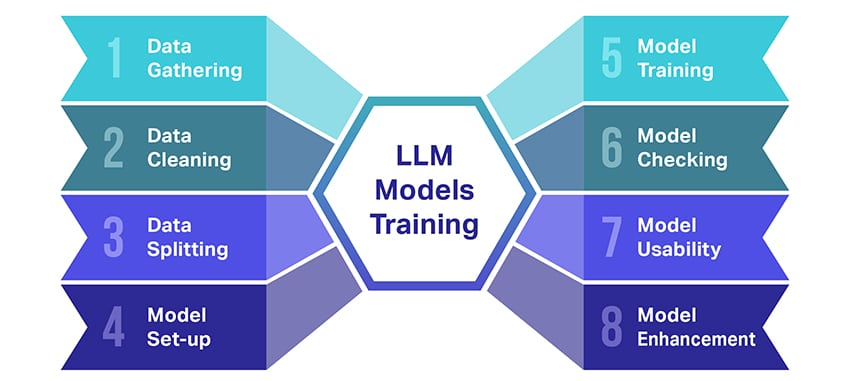

**Large language models**
 are trained on massive amounts of text data, often including the entire internet or a large subset of it. This allows the model to learn patterns and relationships between words, phrases, and sentences, enabling it to generate coherent and meaningful language output.

**High Level View ,How LLM works for Text Generation**

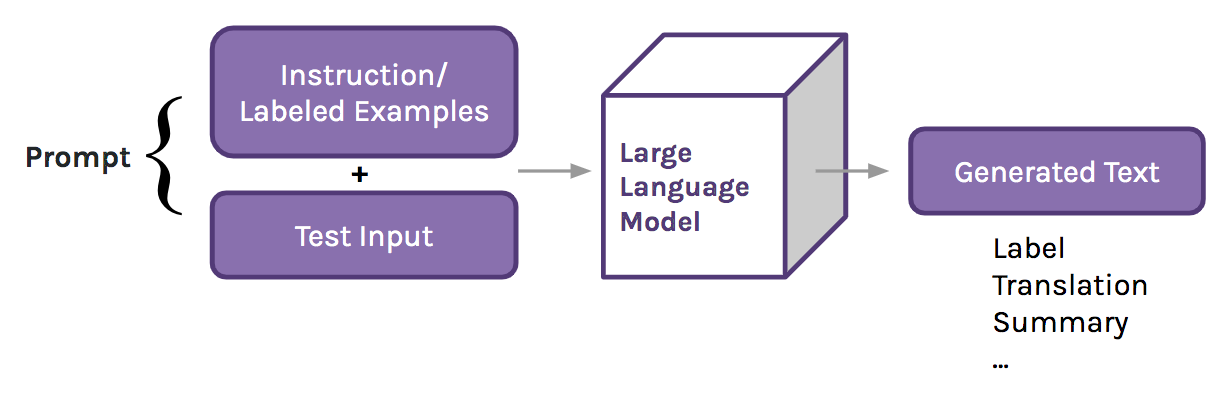

How does it work?

The core of most large language models is a deep neural network called a **transformer,** which was first introduced in 2017.

The transformer is designed to process sequential data, such as language, by allowing information to flow bidirectionally between each input and output token, that is, it processes both the current word and its previous word at the same time to understand the pattern.

The training process of an LLM involves pre-training and fine-tuning.

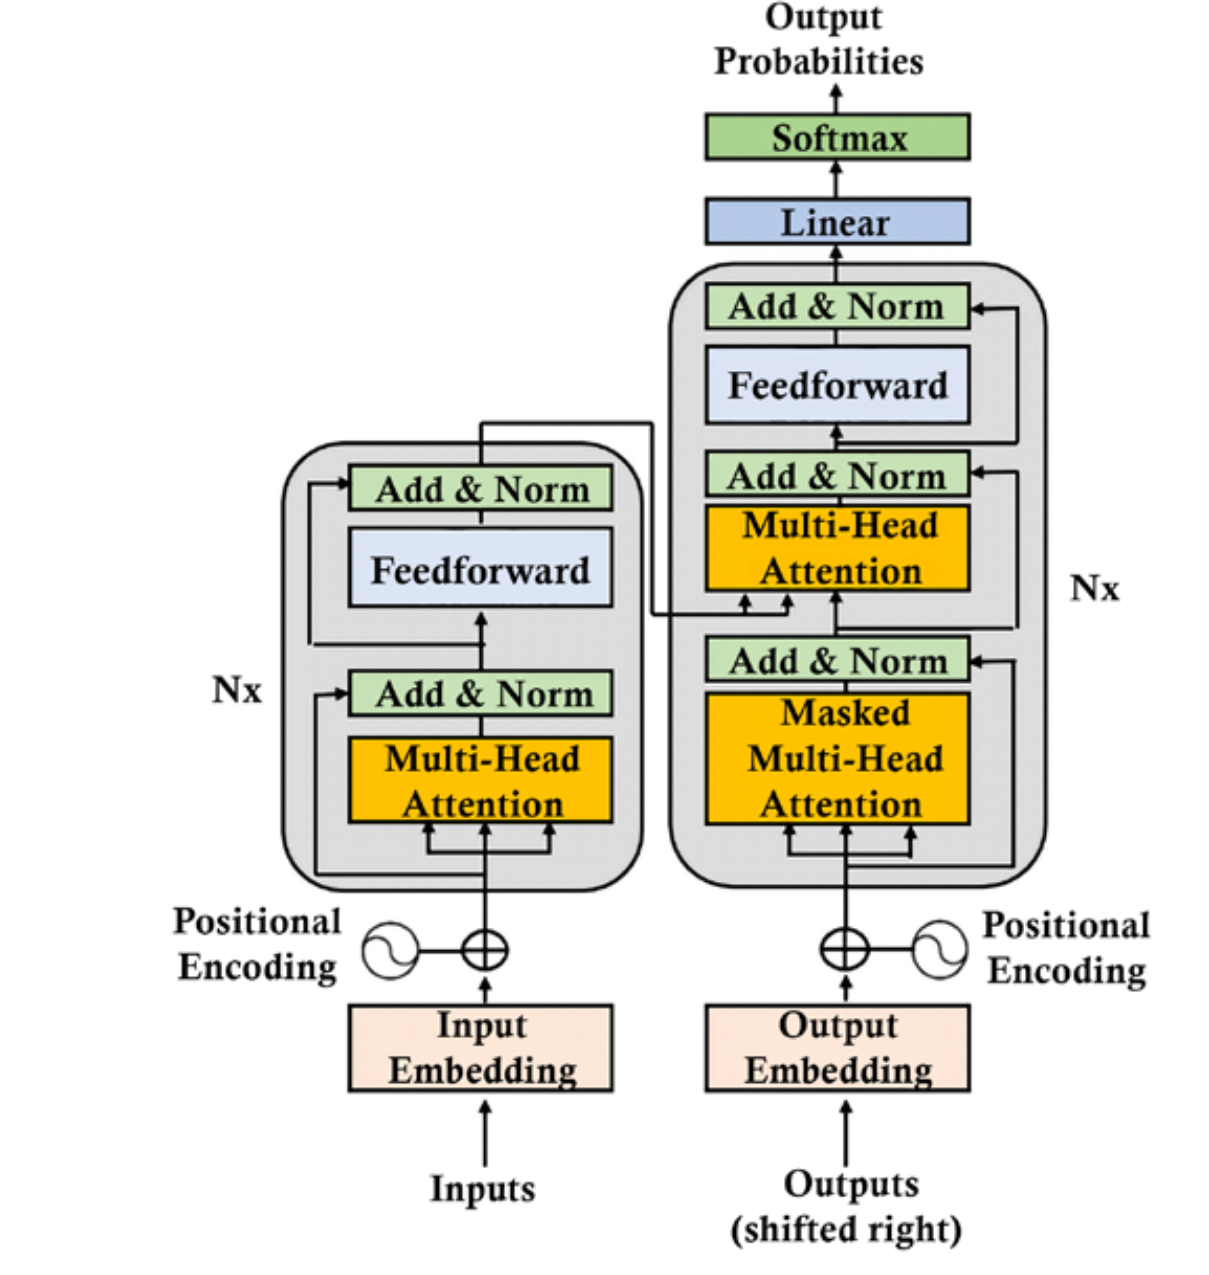

**Text embeddings** are a NLP technique that converts textual data into numerical vectors that can be processed by machine learning algorithms, especially large models. These vector representations are designed to capture the semantic meaning and context of the words they represent.

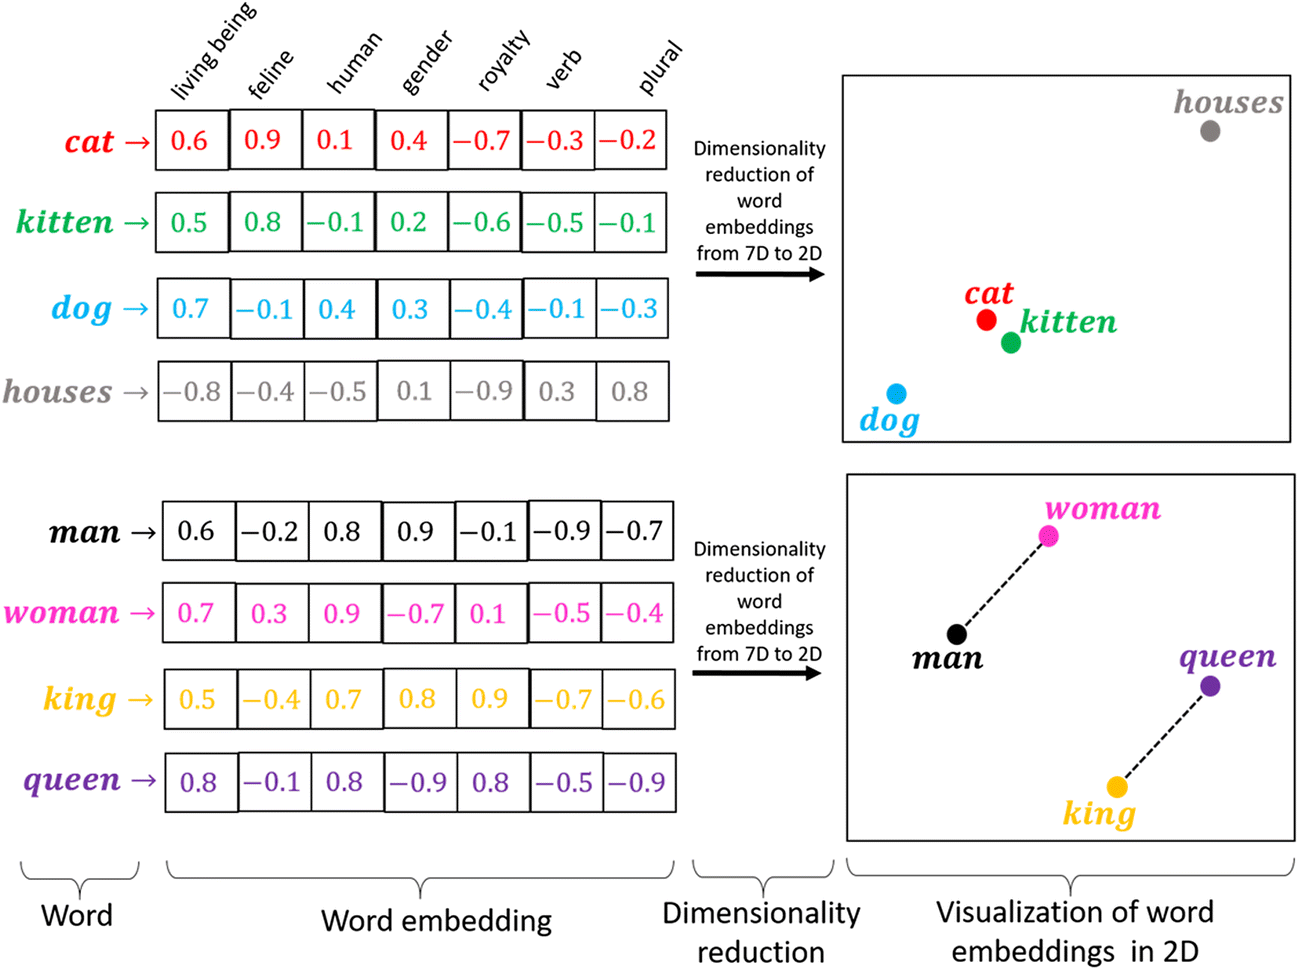

**A Gentle Introduction to Positional Encoding in Transformer Models**

In languages, the order of the words and their position in a sentence really matters. The meaning of the entire sentence can change if the words are re-ordered. When implementing NLP solutions, recurrent neural networks have an inbuilt mechanism that deals with the order of sequences. The transformer model, however, does not use recurrence or convolution and treats each data point as independent of the other. Hence, positional information is added to the model explicitly to retain the information regarding the order of words in a sentence. Positional encoding is the scheme through which the knowledge of the order of objects in a sequence is maintained.

For this tutorial, we’ll simplify the notations used in this remarkable paper, Attention Is All You Need by Vaswani et al. After completing this tutorial, you will know:

What is positional encoding, and why it’s important
Positional encoding in transformers
Code and visualize a positional encoding matrix in Python using NumPy
Kick-start your project with my book Building Transformer Models with Attention. It provides self-study tutorials with working code to guide you into building a fully-working transformer model that can
translate sentences from one language to another...

Let’s get started.

What is positional encoding
Mathematics behind positional encoding in transformers
Implementing the positional encoding matrix using NumPy
Understanding and visualizing the positional encoding matrix

What Is Positional Encoding?
Positional encoding describes the location or position of an entity in a sequence so that each position is assigned a unique representation. There are many reasons why a single number, such as the index value, is not used to represent an item’s position in transformer models. For long sequences, the indices can grow large in magnitude. If you normalize the index value to lie between 0 and 1, it can create problems for variable length sequences as they would be normalized differently.

Transformers use a smart positional encoding scheme, where each position/index is mapped to a vector. Hence, the output of the positional encoding layer is a matrix, where each row of the matrix represents an encoded object of the sequence summed with its positional information. An example of the matrix that encodes only the positional information is shown in the figure below

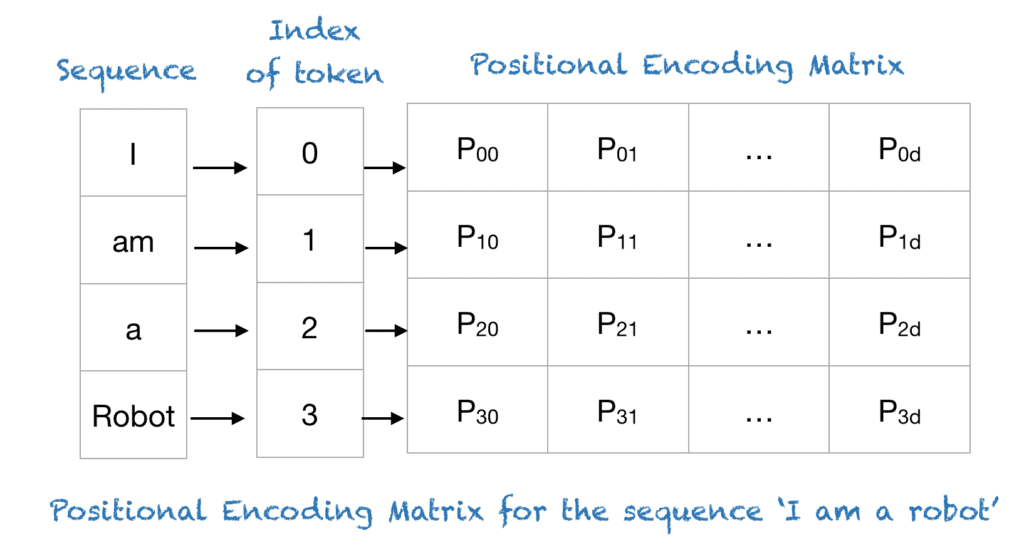

A **self-attention** layer computes self-attention for its input. It does this by:
Computing queries, keys, and values from the input
Computing the scaled dot-product attention across heads using the queries, keys, and values
Self-attention is an attention mechanism that relates different positions of a single sequence to compute a representation of that sequence. It's also known as intra attention.


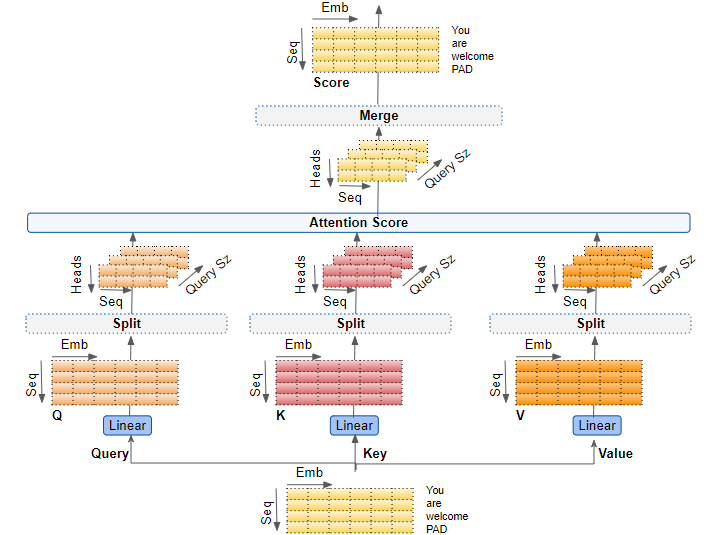

GPT is a short form for Generative Pre-Trained Transformer. OpenAI was created to build a language learning algorithm that could learn from experience without the need to read or write any text to produce new language or thoughts. This technology is called ‘Generative Pre-trained Transformers.’ It provides pre-trained models that can do tasks like translation, speech recognition, generating natural language, etc. These models are trained on large amounts of data and can then be fine-tuned with various kinds of data to perform specific tasks like how humans learn the language. The architecture of the encoder-decoder model of GPT is shown below:

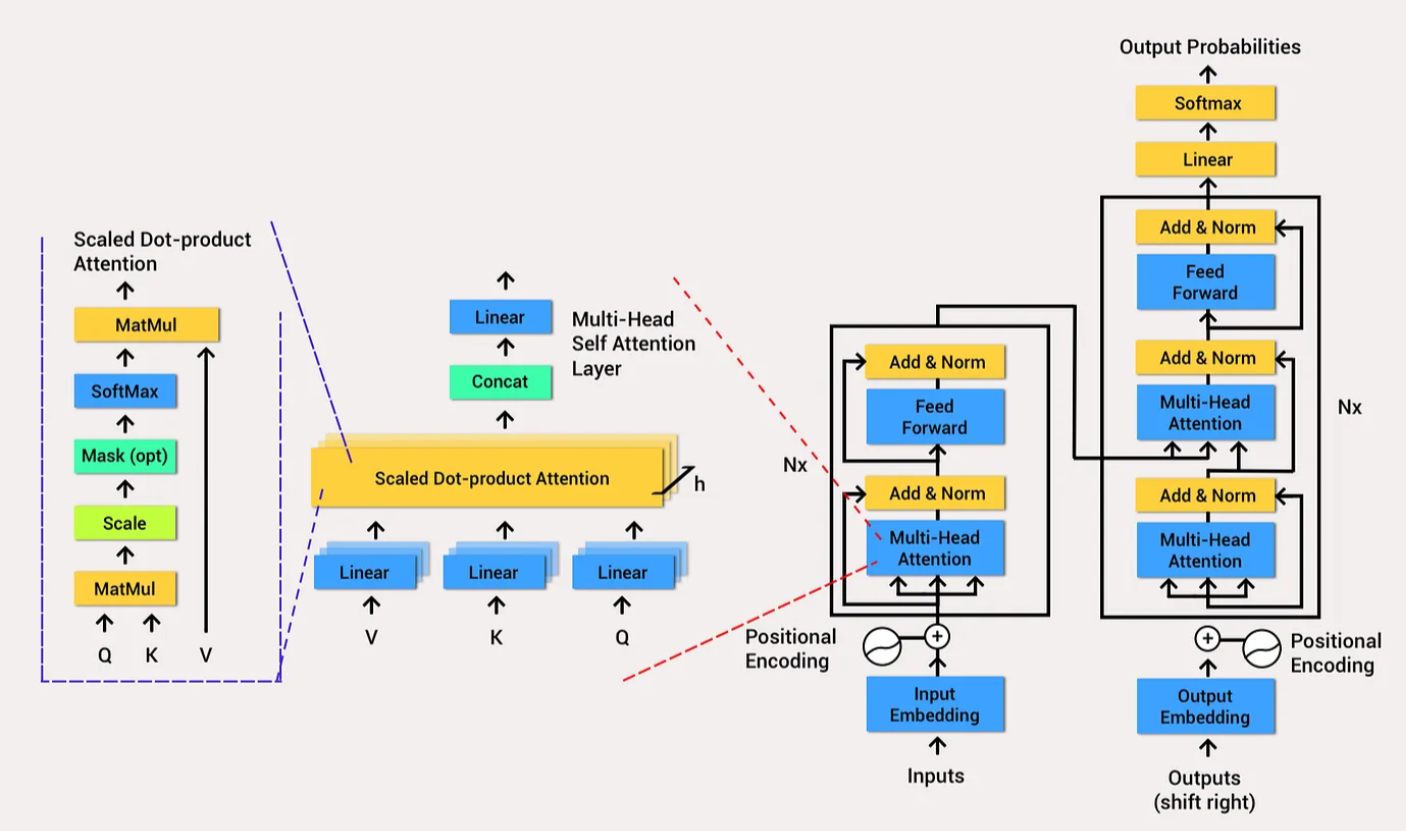

In [ ]:
!pip install transformers

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Load the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Example input text
input_text = """
The GPT-2 model is a powerful language model developed by OpenAI.
It has shown remarkable performance in various natural language processing tasks.
In this example, we'll use GPT-2 for text summarization.
"""

# Tokenize and encode the input text
input_ids = tokenizer.encode(input_text, return_tensors="tf", max_length=512, truncation=True)

# Generate the summary
summary_ids = model.generate(input_ids, max_length=200, num_beams=4, length_penalty=2.0, early_stopping=True)

# Decode and print the generated summary
summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("Generated Summary:")
print(summary_text)


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Summary:

The GPT-2 model is a powerful language model developed by OpenAI.
It has shown remarkable performance in various natural language processing tasks.
In this example, we'll use GPT-2 for text summarization.
The GPT-2 model is a powerful language model developed by OpenAI.
It has shown remarkable performance in various natural language processing tasks.
In this example, we'll use GPT-2 for text summarization.
The GPT-2 model is a powerful language model developed by OpenAI.
It has shown remarkable performance in various natural language processing tasks.
In this example, we'll use GPT-2 for text summarization.
The GPT-2 model is a powerful language model developed by OpenAI.
The GPT-2 model is a powerful language model developed by OpenAI.


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U
!pip install transformers[torch]

In [ ]:
from transformers import pipeline

# create pieline for generating text
gen = pipeline('text-generation') # uses GPT-2

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
gen("I am using transformers text-generation pipeline from Hugging Face library to generate")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am using transformers text-generation pipeline from Hugging Face library to generate transforms, and then write the transformed models from that data set to render the model: transform(width=1,height=0.75f), generateTransforms("'}]

In [ ]:
import pprint

In [ ]:
prompt = "I am using transformers text-generation pipeline from Hugging Face library to generate"
gen(prompt,num_return_sequences = 3, max_length = 30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am using transformers text-generation pipeline from Hugging Face library to generate image to a single file named image on github. There is already a'},
 {'generated_text': 'I am using transformers text-generation pipeline from Hugging Face library to generate a text-only list of text labels. The format:\n\n'},
 {'generated_text': 'I am using transformers text-generation pipeline from Hugging Face library to generate a single-dimensional 3D object [ edit ]\n\nGenerating'}]

In [ ]:
# download data from provided link
!wget https://www.dropbox.com/s/0xylltp1vxf31vj/robert_frost.txt?dl=0

--2024-01-08 13:58:25--  https://www.dropbox.com/s/0xylltp1vxf31vj/robert_frost.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0xylltp1vxf31vj/robert_frost.txt [following]
--2024-01-08 13:58:25--  https://www.dropbox.com/s/raw/0xylltp1vxf31vj/robert_frost.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaadb9f388a73189ff3340f7a61.dl.dropboxusercontent.com/cd/0/inline/CK9KZWq-hqHB6KVjp1TkJIjsRmbd-9MzdSLdQtEAjslNdtcgunUkru42MN41N2GCOcSJTcc1fVVzzTAHG3sLIiohO_VnOL1khXh1GyBdt_rZCKAcFqbZ8YApTq02upf7uzd34XC4vzbV0csv5nblUxYS/file# [following]
--2024-01-08 13:58:25--  https://ucaadb9f388a73189ff3340f7a61.dl.dropboxusercontent.com/cd/0/inline/CK9KZWq-hqHB6KVjp1TkJIjsRmbd-9MzdSLdQtEAjslNdtcgunUkru42MN41N2GCOcSJTcc1fVVzzTAHG3sLI

In [ ]:
# import required libraries
import textwrap
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
!cat /content/robert_frost.txt?dl=0

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth; 

Then took the other, as just as fair,
And having perhaps the better claim
Because it was grassy and wanted wear,
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day! 
Yet knowing how way leads on to way
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I,
I took the one less traveled by,
And that has made all the difference.

Whose woods these are I think I know.
His house is in the village, though; 
He will not see me stopping here
To watch his woods fill up with snow.

My little horse must think it queer
To stop without a farmhouse near
Between the woods and frozen lake
The darkest evenin

In [ ]:
lines = [line.rstrip() for line in open("robert_frost.txt?dl=0")]
lines = [line for line in lines if len(line) > 0]

In [ ]:
pprint(lines[0])

'Two roads diverged in a yellow wood,'


In [ ]:
pprint(gen(lines[0],num_return_sequences = 3, max_length = 20))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Two roads diverged in a yellow wood, the blue line going '
                    'over their heads. The three of'},
 {'generated_text': 'Two roads diverged in a yellow wood, along whose edge the '
                    'creek ran at the base of a'},
 {'generated_text': 'Two roads diverged in a yellow wood, but by the time the '
                    'lights came on they were gone'}]


In [ ]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace = False, fix_sentence_endings = True)

In [ ]:
prompt  = "Current state of deep learning and its potential impact on various industries"
out = gen(prompt, max_length = 500)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Current state of deep learning and its potential impact on various
industries

Nathan E. Jones, MA

Abstract

Deep learning research
using neural networks has provided new insights into neural network
models, but only a small proportion of it may have applied to high-
frequency trading.  The data obtained from DeepMind's deep learning
network—currently deployed by the University of Alabama in Huntsville
and by other institutions such as Texas Instruments, Carnegie Mellon
University, and MIT—has revealed that deep learning can, when applied
with other computational methods, modify the behavior of large-scale
systems (e.g., stock splits or binary trees) for large-scale trading.
The results are of special relevance to algorithmic algorithmic
trading, in which neural nets enable real-world applications like
buying, selling and distributing social assets on a global market.
These findings have important implications for how a set of
algorithmic processes are integrated into data flows and s